In [1]:
import pandas as pd
import numpy as np

import pyaf.ForecastEngine as autof
import pyaf.Bench.TS_datasets as tsds


%matplotlib inline  

In [2]:
b1 = tsds.load_ozone()
df = b1.mPastData

     Month  Ozone       Time
0  1955-01    2.7 1955-01-01
1  1955-02    2.0 1955-02-01
2  1955-03    3.6 1955-03-01
3  1955-04    5.0 1955-04-01
4  1955-05    6.5 1955-05-01


In [3]:
b1.mHorizon

12

In [4]:

lEngine = autof.cForecastEngine()


INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signals': ['Ozone'], 'Horizons': {'Ozone': 12}}))
INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['Ozone'], 'Transformations': [('Ozone', 'None', '_', 'T+S+R'), ('Ozone', 'None', 'Diff_', 'T+S+R'), ('Ozone', 'None', 'RelDiff_', 'T+S+R'), ('Ozone', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Ozone', 'Horizon': 12, 'Transformation': 'Diff_Ozone', 'DecompositionType': 'T+S+R'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Ozone', 'Horizon': 12, 'Transformation': '_Ozone', 'DecompositionType': 'T+S+R'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Ozone', 'Horizon': 12, 'Transformation': 'CumSum_Ozone', 'DecompositionType': 'T+S+R'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Ozone', 'Horizon': 12, 'Transformation': 'RelDiff_Ozone', 'DecompositionType': 'T+S+R'}))
INFO:pyaf.timing:('OPERATION_END_ELAP

  Transformation DecompositionType  \
4         _Ozone             T+S+R   
5         _Ozone             T+S+R   
2         _Ozone             T+S+R   
3         _Ozone             T+S+R   
0         _Ozone             T+S+R   

                                               Model    Voting Complexity  \
4   _Ozone_LinearTrend_residue_Cycle_12_residue_NoAR  455.9167      SSSSS   
5  _Ozone_LinearTrend_residue_Seasonal_MonthOfYea...  455.9167      SSSSS   
2     _Ozone_PolyTrend_residue_Cycle_12_residue_NoAR  456.9167      MSSSS   
3  _Ozone_PolyTrend_residue_Seasonal_MonthOfYear_...  456.9167      MSSSS   
0   _Ozone_PolyTrend_residue_Cycle_12_residue_AR(51)  460.0833      LMSSS   

   Forecast_MASE_1  Forecast_MASE_H  
4           0.7151           0.7151  
5           0.7151           0.7151  
2           0.7082           0.7082  
3           0.7082           0.7082  
0           0.6819           0.7102  


INFO:pyaf.timing:('OPERATION_END_ELAPSED', 1.326, ('PLOTTING', {'Signals': ['Ozone']}))


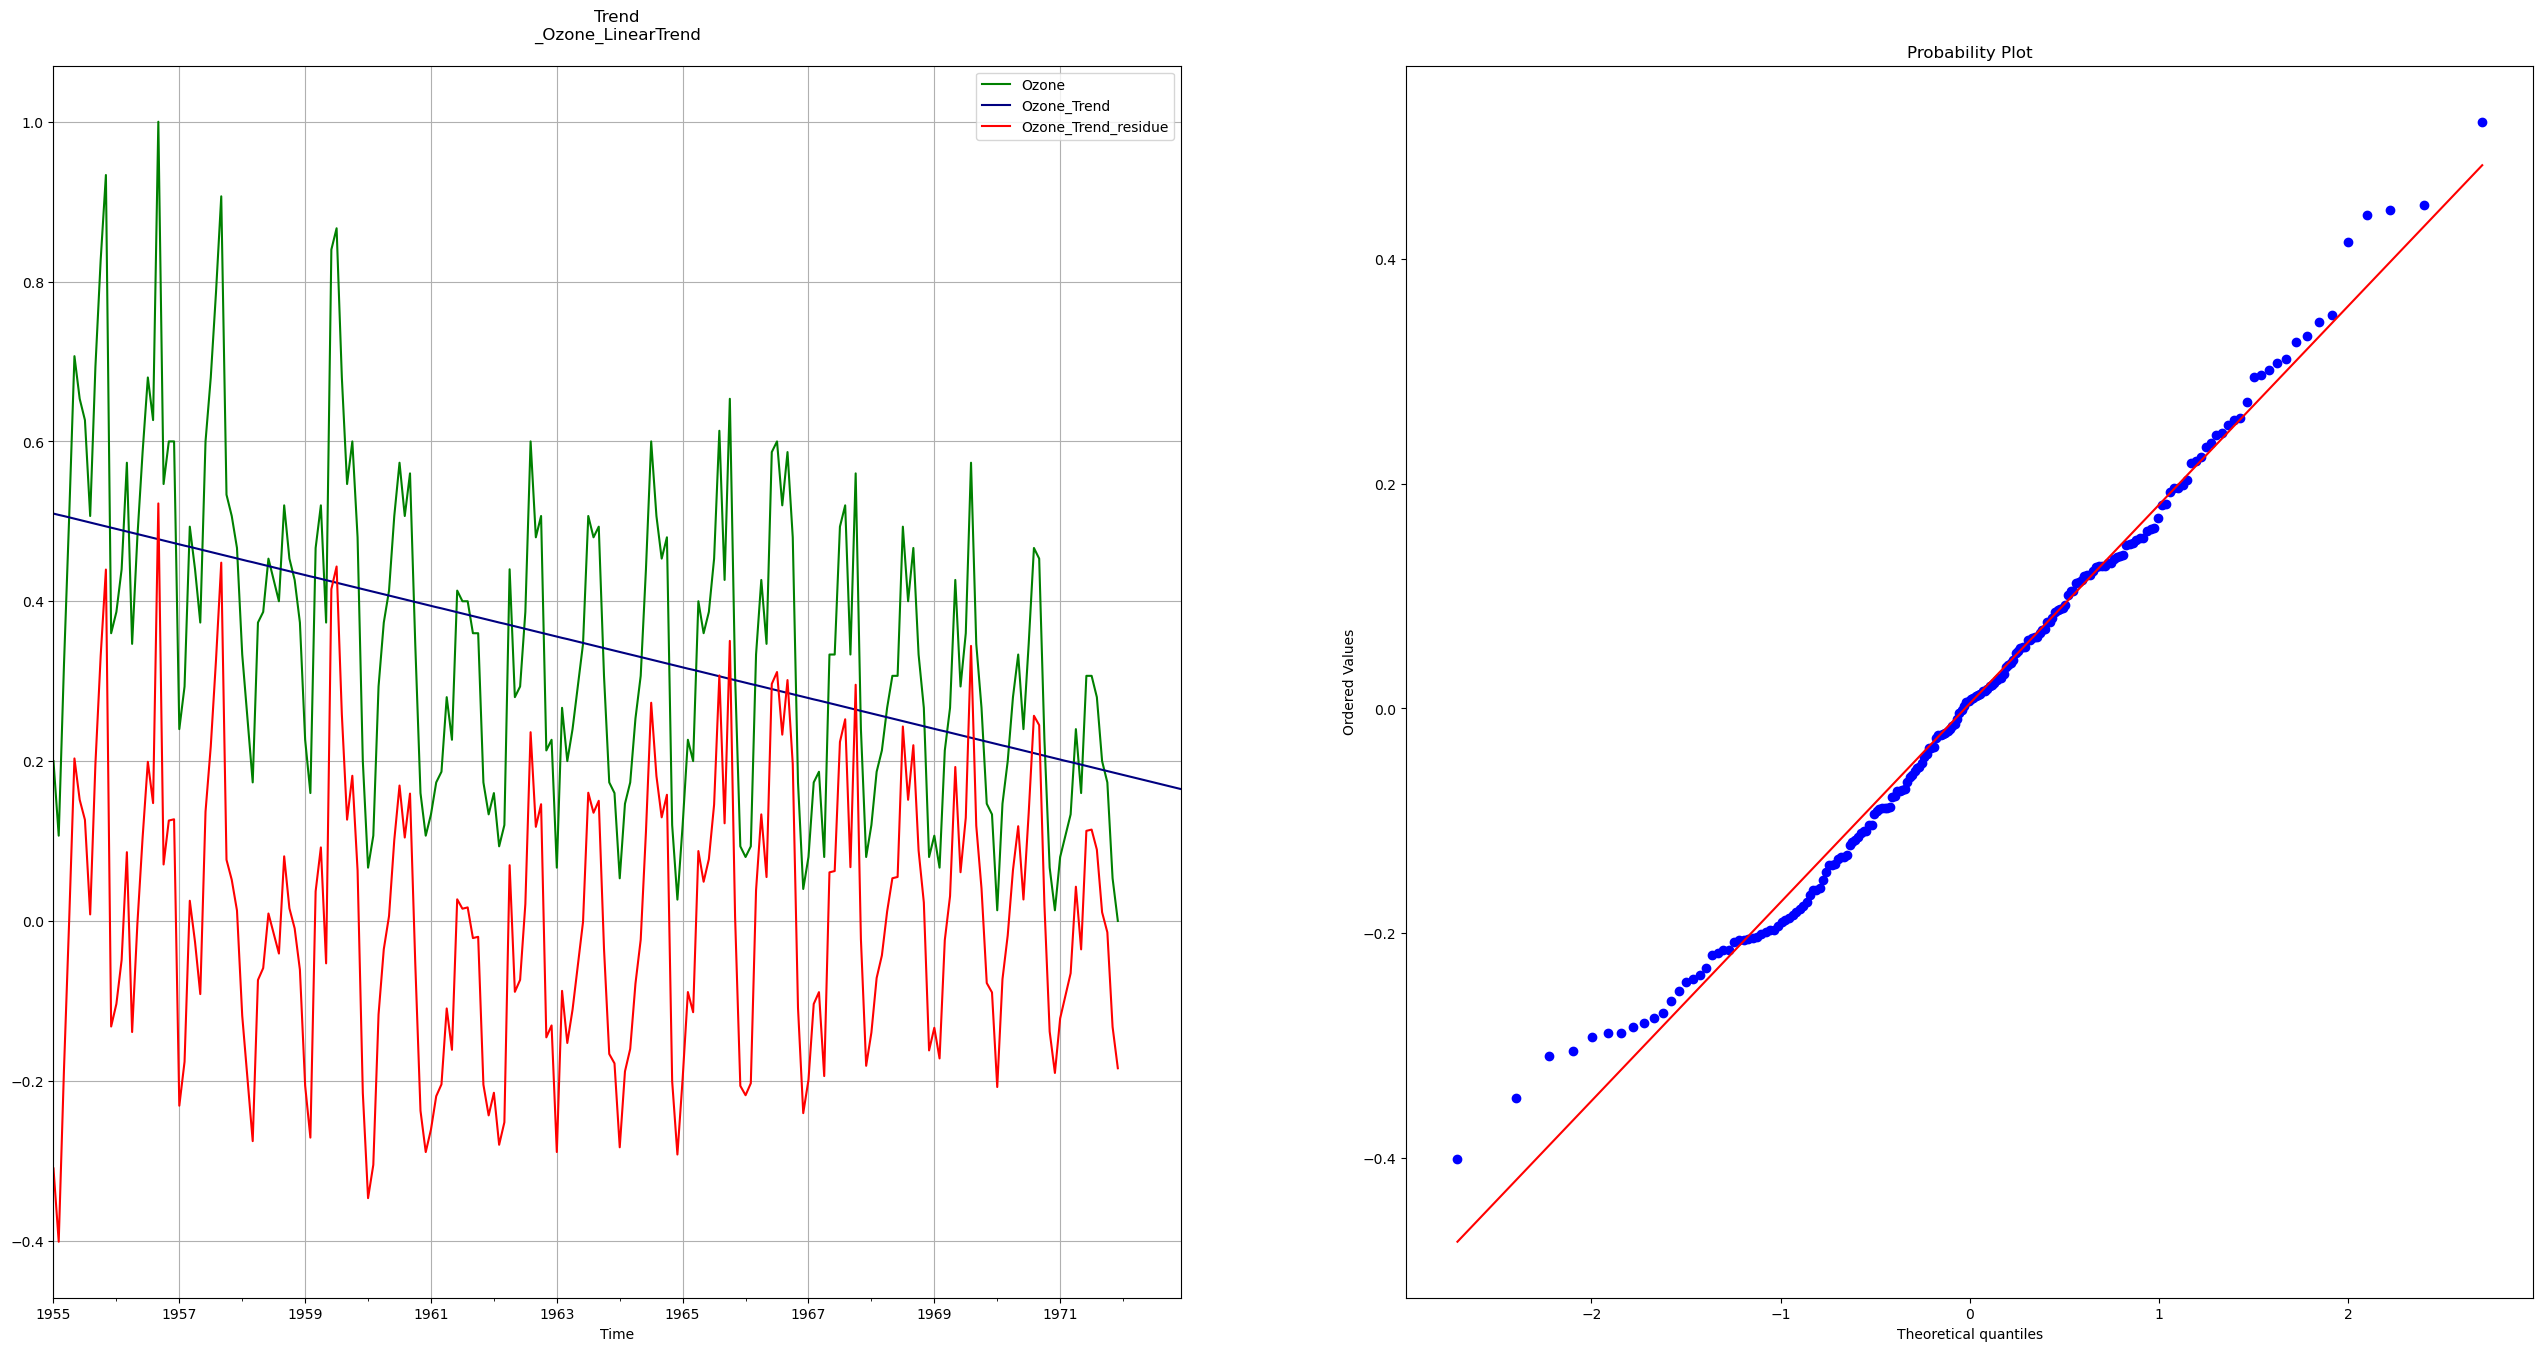

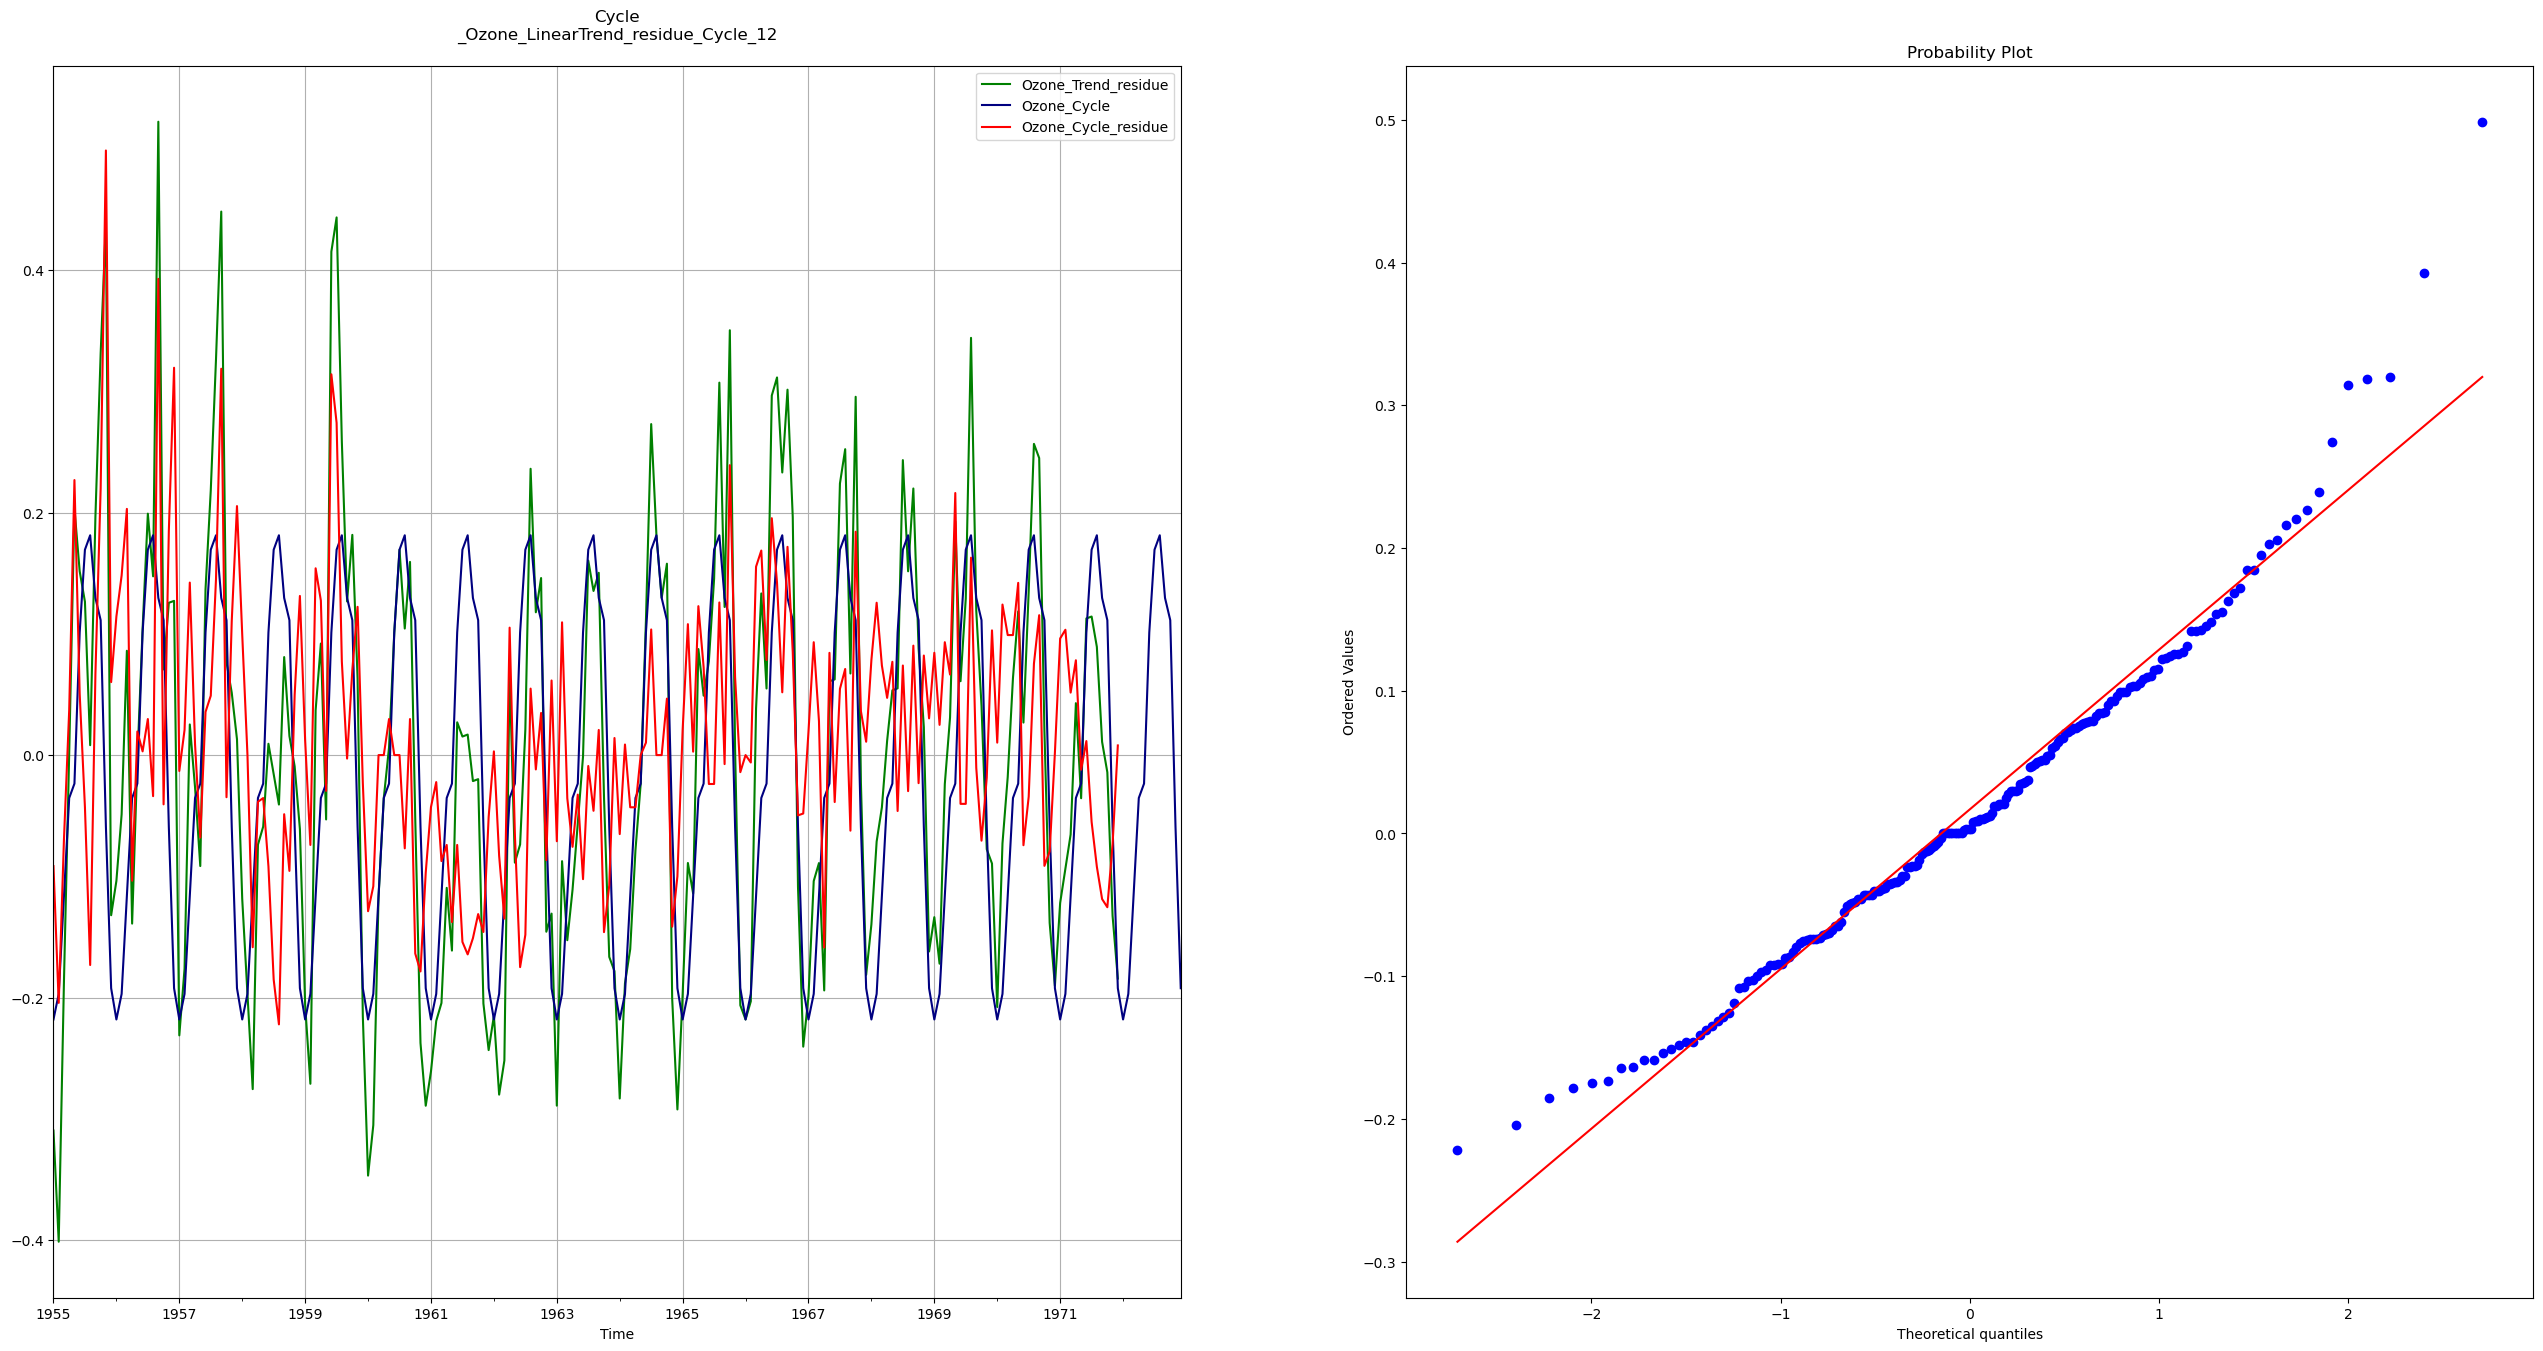

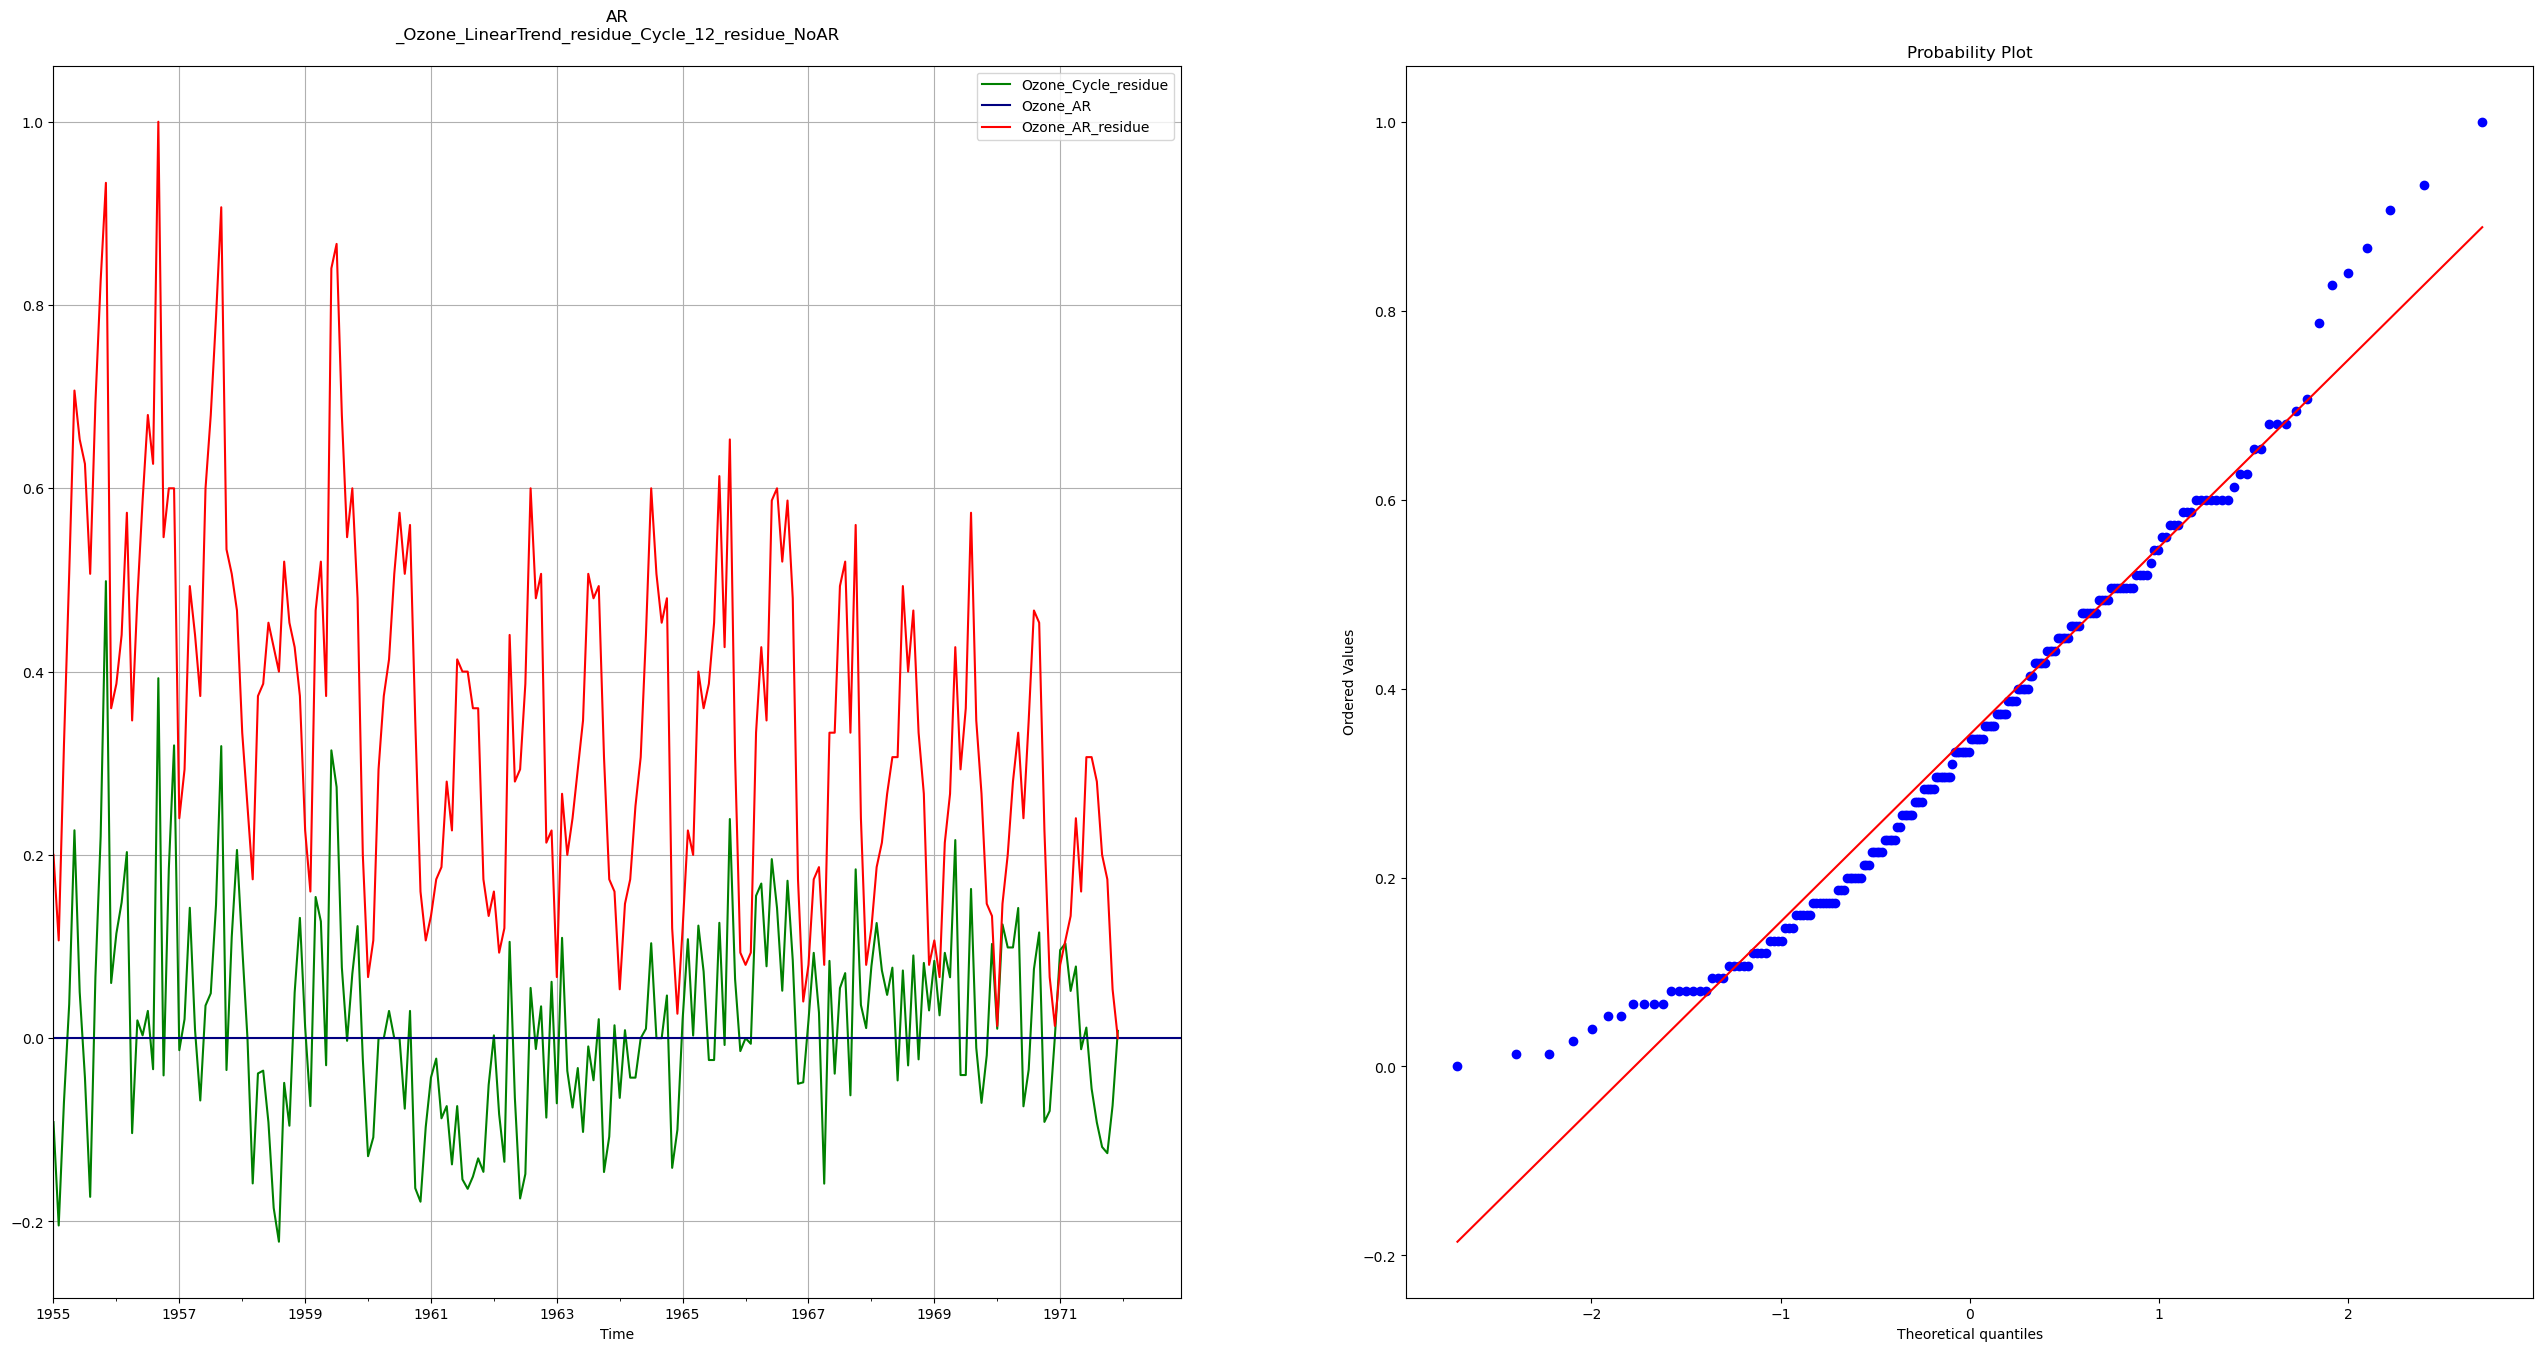

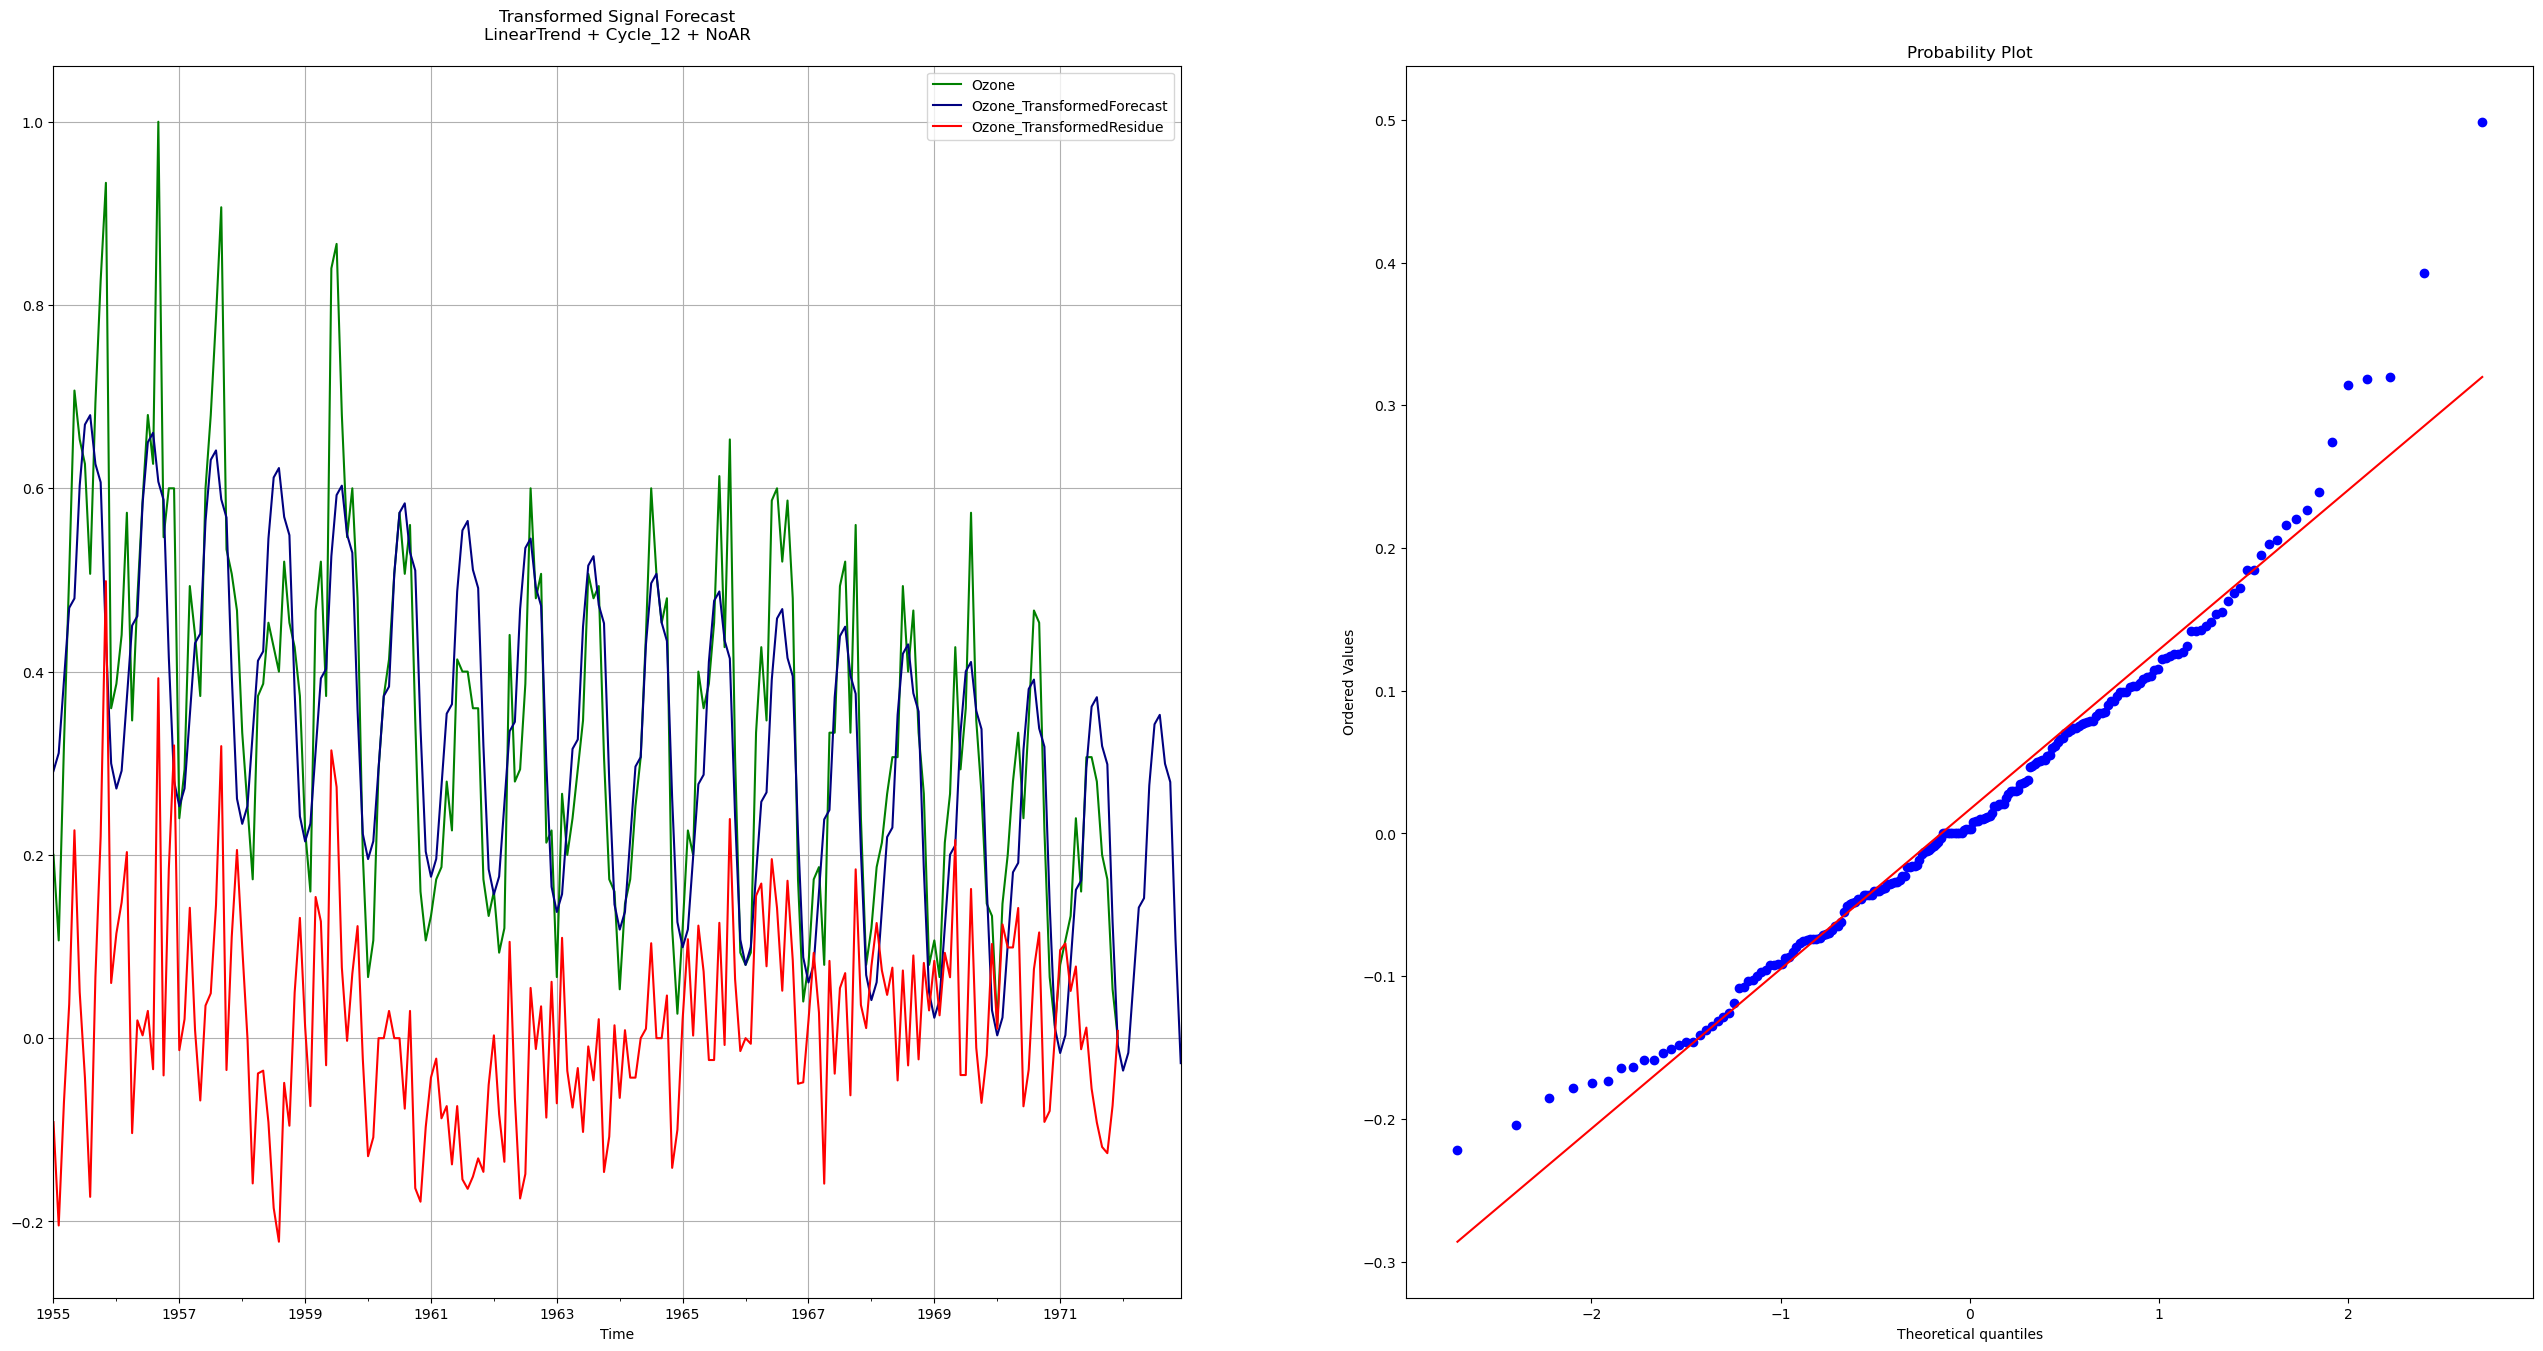

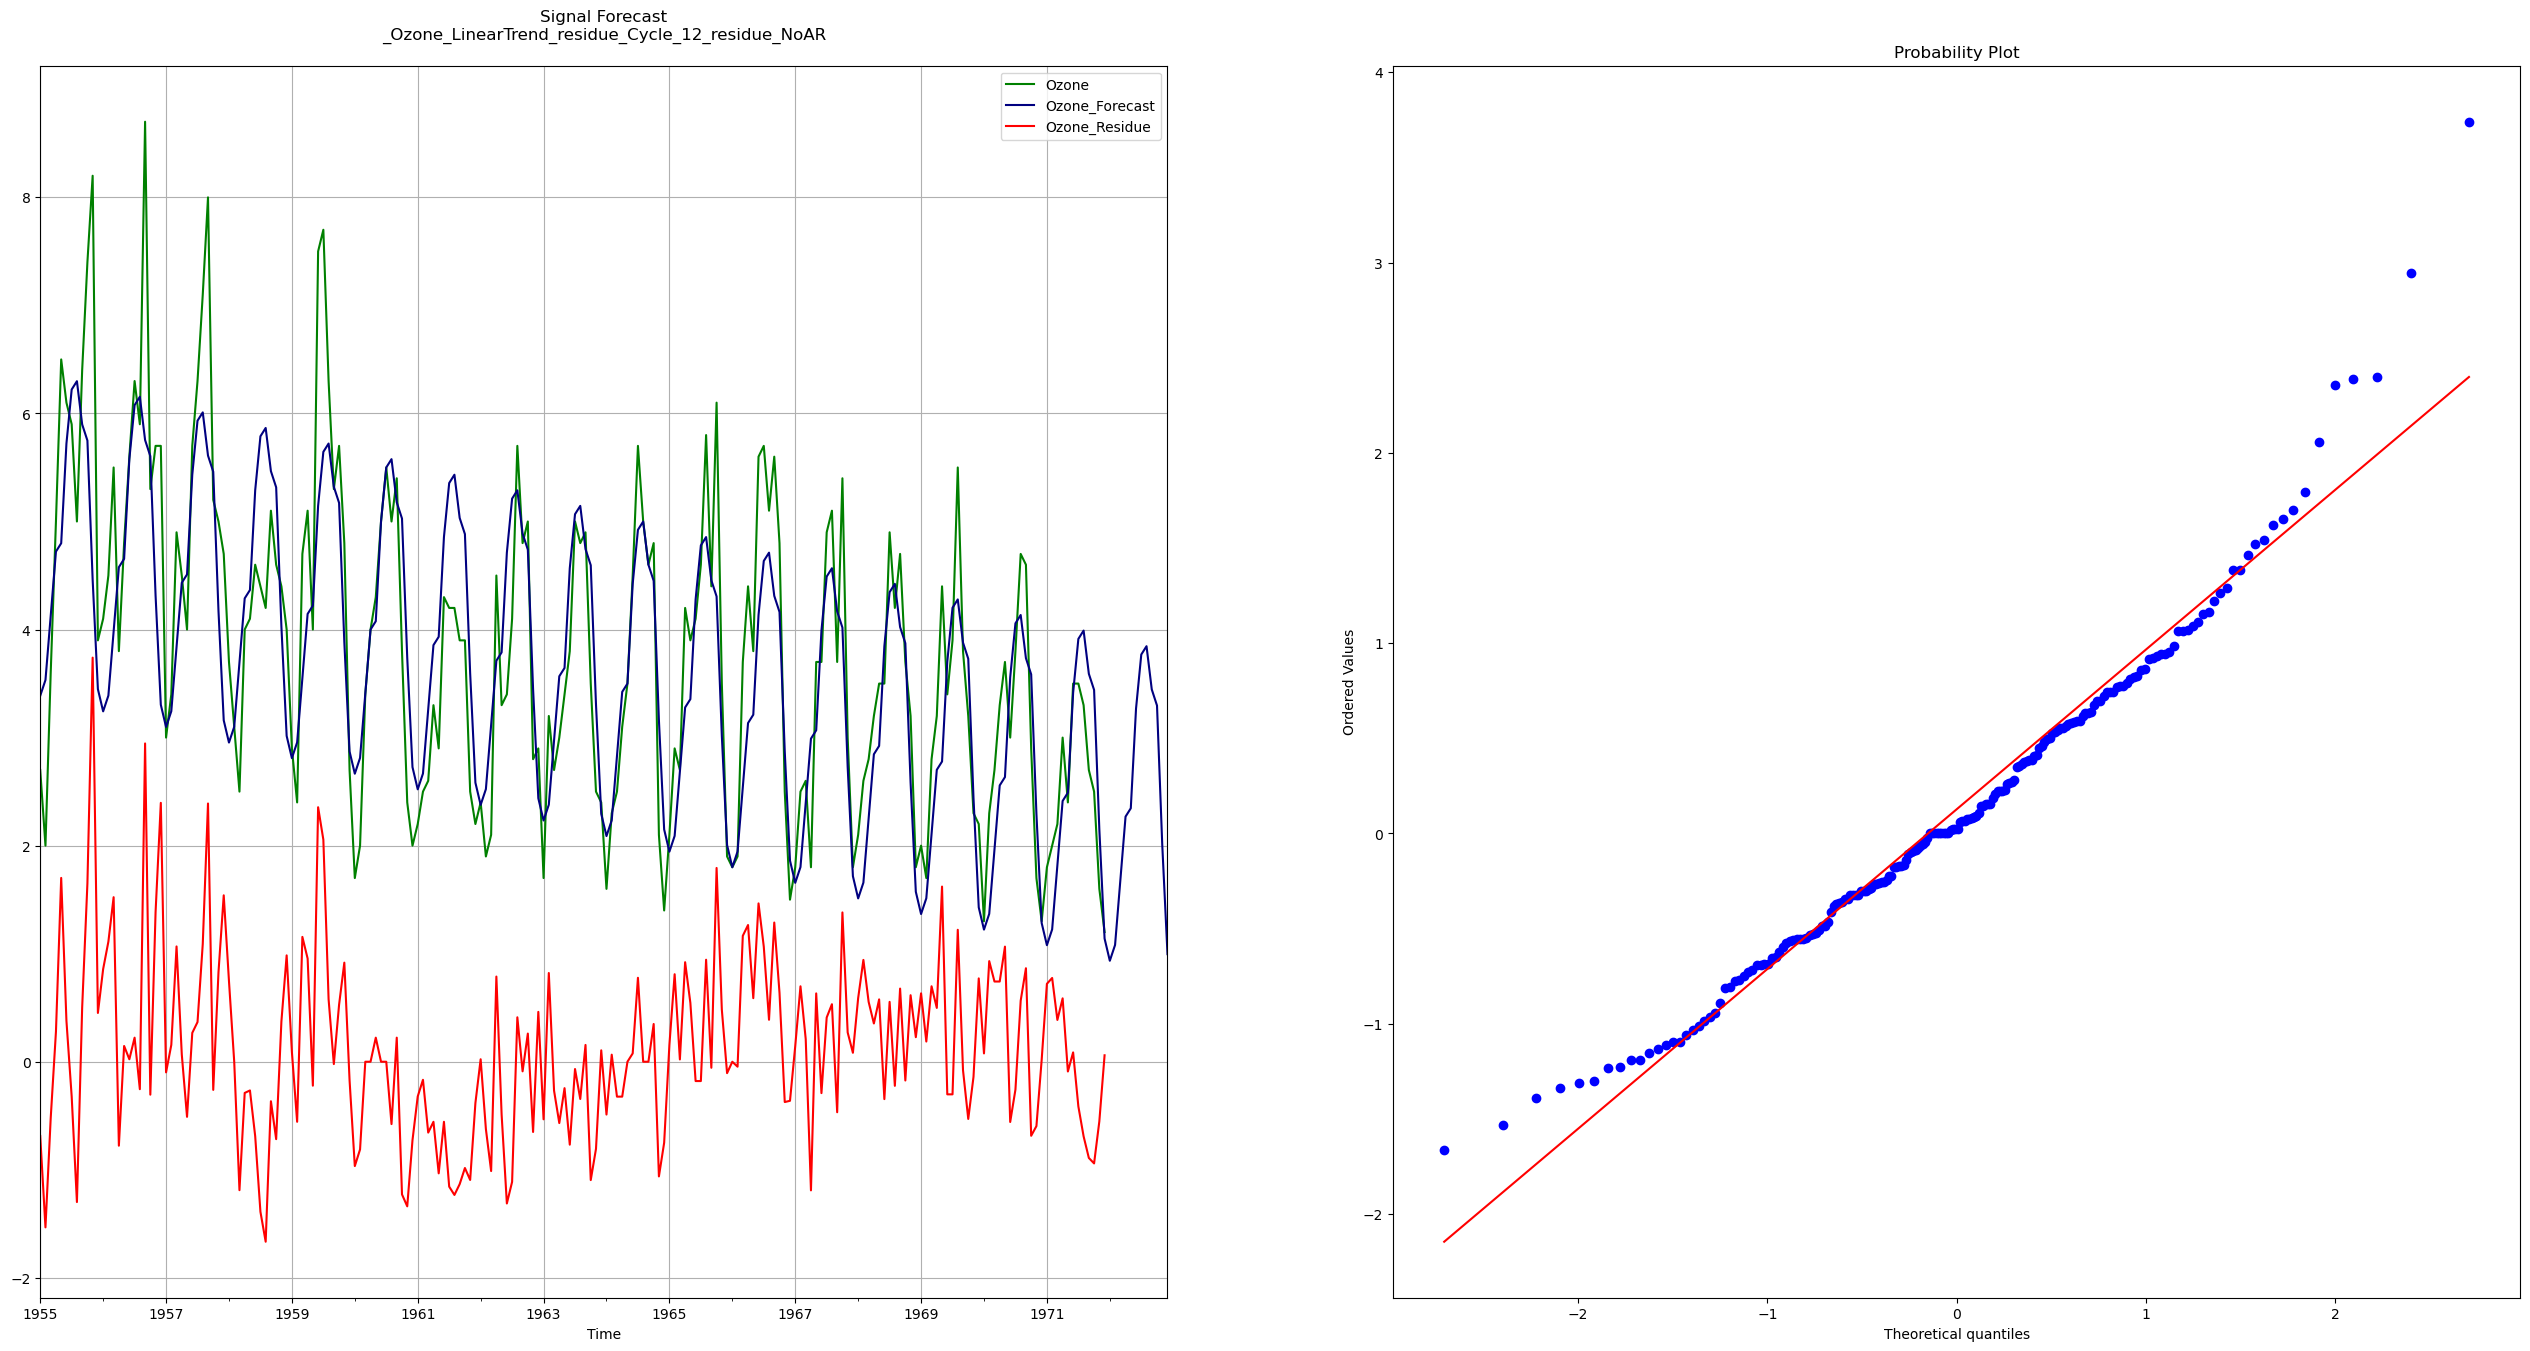

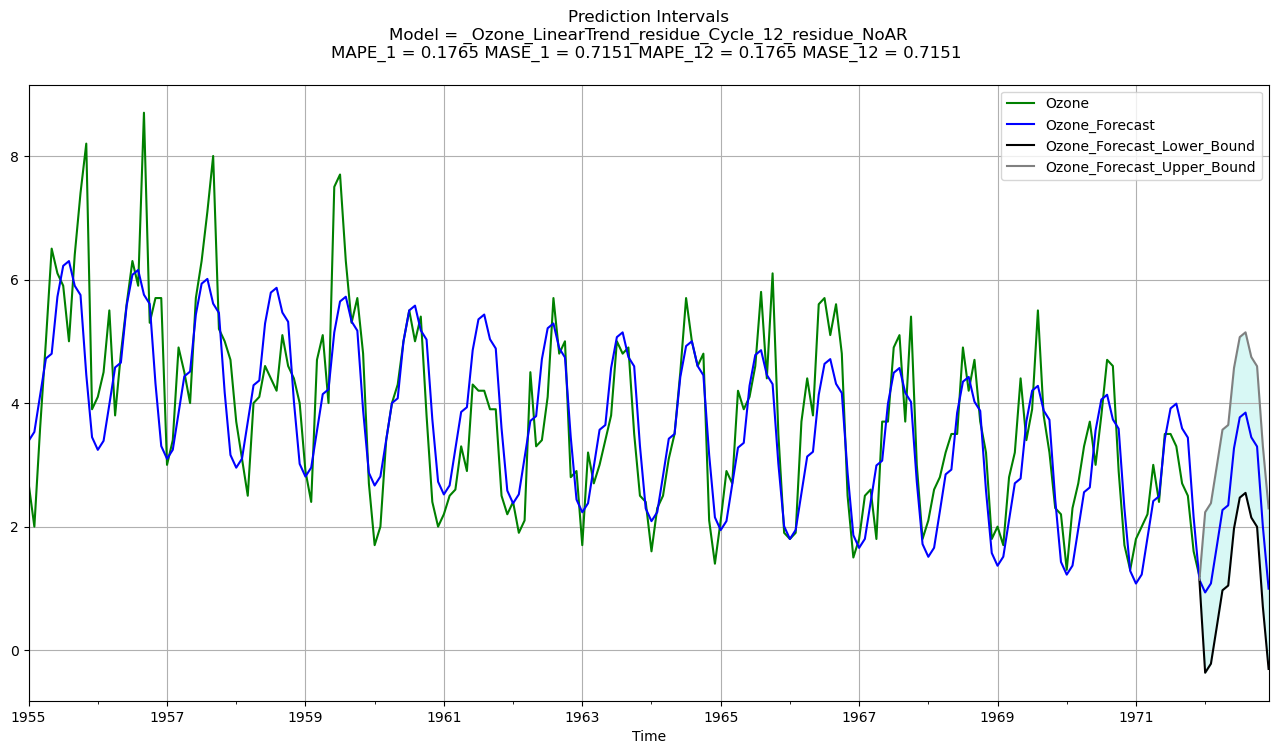

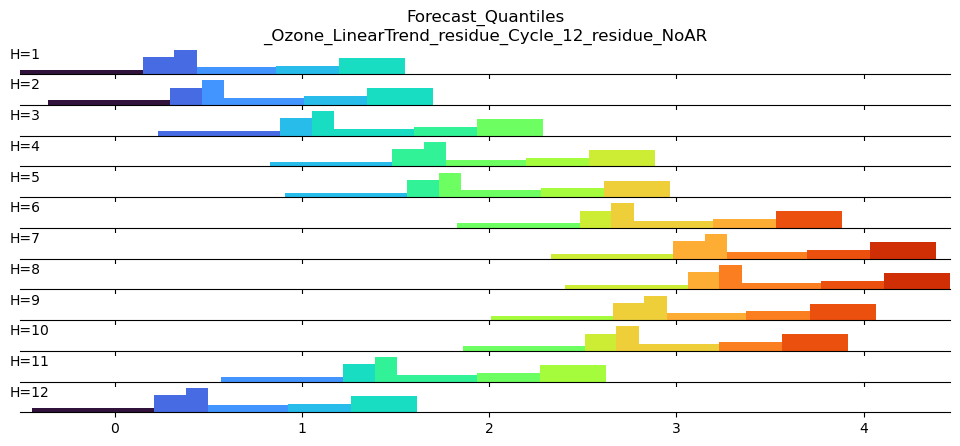

In [5]:
lEngine.mOptions.mModelSelection_Criterion = 'MASE'
lEngine.train(df , b1.mTimeVar , b1.mSignalVar, b1.mHorizon);
lEngine.getModelInfo();
print(lEngine.mSignalDecomposition.mModelShortListBySignal[b1.mSignalVar].head());
lEngine.standardPlots()

In [6]:
dfapp_in = df.copy();
dfapp_in.tail()

#H = 12
dfapp_out = lEngine.forecast(dfapp_in, b1.mHorizon);
#dfapp_out.to_csv("outputs/ozone_apply_out.csv")
dfapp_out.tail(2 * b1.mHorizon)


INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Ozone'], 'Horizon': 12}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.191, ('FORECASTING', {'Signals': ['Ozone'], 'Horizon': 12}))


,Time,Ozone,row_number,Time_Normalized,_Ozone,_Ozone_LinearTrend,_Ozone_LinearTrend_residue,cycle_internal,_Ozone_LinearTrend_residue_Cycle_12,_Ozone_LinearTrend_residue_Cycle_12_residue,...,Ozone_Residue,Ozone_Forecast_Lower_Bound,Ozone_Forecast_Upper_Bound,Ozone_Forecast_Quantile_2,Ozone_Forecast_Quantile_18,Ozone_Forecast_Quantile_34,Ozone_Forecast_Quantile_50,Ozone_Forecast_Quantile_66,Ozone_Forecast_Quantile_82,Ozone_Forecast_Quantile_98
192,1971-01-01,1.8,192,1.263294,0.080000,0.201917,-0.121917,0,-0.218079,0.096162,...,0.721214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,1971-02-01,2.0,193,1.269996,0.106667,0.200284,-0.093618,1,-0.196993,0.103375,...,0.775316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,1971-03-01,2.2,194,1.276048,0.133333,0.198810,-0.065476,2,-0.117022,0.051546,...,0.386593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,1971-04-01,3.0,195,1.282750,0.240000,0.197177,0.042823,3,-0.035390,0.078212,...,0.586593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,1971-05-01,2.4,196,1.289235,0.160000,0.195597,-0.035597,4,-0.023536,-0.012061,...,-0.090458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,1971-06-01,3.5,197,1.295936,0.306667,0.193965,0.112702,5,0.101156,0.011546,...,0.086593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,1971-07-01,3.5,198,1.302421,0.306667,0.192385,0.114282,6,0.169403,-0.055121,...,-0.413407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,1971-08-01,3.3,199,1.309122,0.280000,0.190752,0.089248,7,0.181309,-0.092061,...,-0.690458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,1971-09-01,2.7,200,1.315824,0.200000,0.189120,0.010880,8,0.129608,-0.118728,...,-0.890458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,1971-10-01,2.5,201,1.322309,0.173333,0.187540,-0.014207,9,0.111277,-0.125484,...,-0.941128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(lEngine.to_json())

{
    "Ozone": {
        "Complexity": {
            "AR": "S",
            "Cycle": "S",
            "Decomposition": "S",
            "Transformation": "S",
            "Trend": "S"
        },
        "Dataset": {
            "Signal": "Ozone",
            "Time": {
                "Horizon": 12,
                "TimeDelta": "<DateOffset: months=1>",
                "TimeMax": "1971-12-01 00:00:00",
                "TimeMin": "1955-01-01 00:00:00",
                "TimeVariable": "Time"
            },
            "Training_Signal_Length": 204
        },
        "Model": {
            "AR_Model": "NoAR",
            "Best_Decomposition": "_Ozone_LinearTrend_residue_Cycle_12_residue_NoAR",
            "Cycle": "Cycle_12",
            "Signal_Decomposition_Type": "T+S+R",
            "Signal_Transoformation": "NoTransf",
            "Trend": "LinearTrend"
        },
        "Model_Performance": {
            "1": {
                "AUC": 0.5766,
                "DiffSMAPE": 0.1903,
    